In [68]:
import json
import numpy as np
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Parse the JSON data
file_path="./reviews_output.json"
with open(file_path, 'r') as file:
    data = json.load(file)


# Function to extract the first float score from a text string
def extract_first_score(text):
    import re
    match = re.search(r"\b\d+\.\d+\b", text)
    if match:
        return float(match.group(0))
    return None


## Extract Scores from Generated Texts

In [69]:
# Extracting scores and computing metrics
gpt2_scores = []
gpt2_finetuned_scores = []
gemma_scores = []
true_scores = []

for item in data:
    gpt2_scores.append(extract_first_score(item['GPT2']))
    gpt2_finetuned_scores.append(extract_first_score(item['GPT2_Finetuned']))
    gemma_scores.append(extract_first_score(item['Gemma']))
    true_scores.append(float(item['True_Score']))

## Evaluations

#### GPT2

In [70]:
clean_gpt2_scores = []
clean_gpt2_true_scores = []

for score, true_score in zip(gpt2_scores, true_scores):
    if score is not None:
        clean_gpt2_scores.append(score)
        clean_gpt2_true_scores.append(true_score)

mse_GPT2 = mean_squared_error(clean_gpt2_true_scores, clean_gpt2_scores)
coverage_GPT2=round(len(clean_gpt2_scores)/len(true_scores)*100,2)
print(coverage_GPT2, "percentage data has score generation from GPT2 model.", "Mean Squared Error is: ", round(mse_GPT2,2))

79.58 percentage data has score generation from GPT2 model. Mean Squared Error is:  10.96


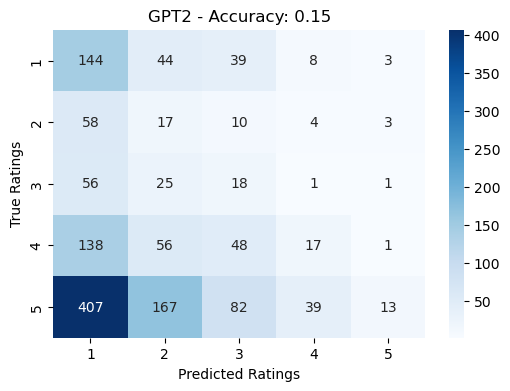

In [71]:
#scores rounded to the nearest integer and clipped to the range between 1 and 5.
gpt2_scores_rounded = [min(max(round(score), 1), 5) for score in clean_gpt2_scores]

cm_gpt2 = confusion_matrix(clean_gpt2_true_scores, gpt2_scores_rounded)
gpt2_accuracy=accuracy_score(clean_gpt2_true_scores, gpt2_scores_rounded)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gpt2, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title(f'GPT2 - Accuracy: {gpt2_accuracy:.2f}')
plt.xlabel('Predicted Ratings')
plt.ylabel('True Ratings')
plt.show()

#### GPT2 Finetuned

In [72]:
clean_gpt2_finetuned_scores = []
clean_gpt2_finetuned_true_scores = []

for score, true_score in zip(gpt2_finetuned_scores, true_scores):
    if score is not None:
        clean_gpt2_finetuned_scores.append(score)
        clean_gpt2_finetuned_true_scores.append(true_score)

mse_GPT2_FT = mean_squared_error(clean_gpt2_finetuned_true_scores, clean_gpt2_finetuned_scores)
coverage_GPT2_FT =round(len(clean_gpt2_finetuned_scores)/len(true_scores)*100,2)
print(coverage_GPT2_FT, "percentage data has score generation from GPT2 Finetuned model.", "Mean Squared Error is: ", round(mse_GPT2_FT,2))

98.29 percentage data has score generation from GPT2 Finetuned model. Mean Squared Error is:  5.98


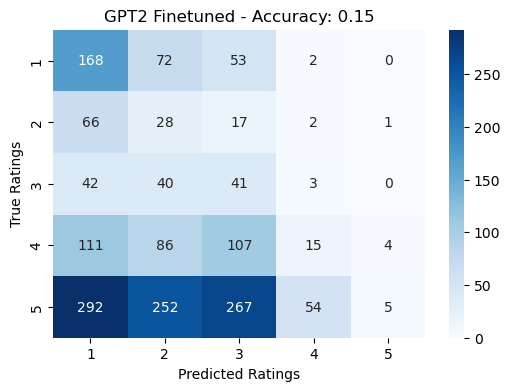

In [73]:
#scores rounded to the nearest integer and clipped to the range between 1 and 5.
gpt2_finetuned_scores_rounded = [min(max(round(score), 1), 5) for score in clean_gpt2_finetuned_scores]

cm_gpt2_ft = confusion_matrix(clean_gpt2_finetuned_true_scores, gpt2_finetuned_scores_rounded)
gpt2_ft_accuracy=accuracy_score(clean_gpt2_finetuned_true_scores, gpt2_finetuned_scores_rounded)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gpt2_ft, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title(f'GPT2 Finetuned - Accuracy: {gpt2_ft_accuracy:.2f}')
plt.xlabel('Predicted Ratings')
plt.ylabel('True Ratings')
plt.show()

### Gemma

In [74]:
clean_gemma_scores = []
clean_gemma_true_scores = []

for score, true_score in zip(gemma_scores, true_scores):
    if score is not None:
        clean_gemma_scores.append(score)
        clean_gemma_true_scores.append(true_score)


mse_Gemma = mean_squared_error(clean_gemma_true_scores, clean_gemma_scores)
coverage_Gemma=round(len(clean_gemma_scores)/len(true_scores)*100,2)
print(coverage_Gemma, "percentage data has score generation from Gemma model.", "Mean Squared Error is: ", round(mse_Gemma,2))

95.51 percentage data has score generation from Gemma model. Mean Squared Error is:  0.79


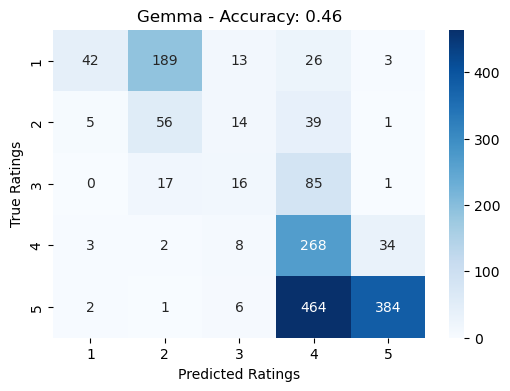

In [75]:
#scores rounded to the nearest integer and clipped to the range between 1 and 5.
gemma_scores_rounded = [min(max(round(score), 1), 5) for score in clean_gemma_scores]

gemma_accuracy=accuracy_score(clean_gemma_true_scores, gemma_scores_rounded)
cm_gemma = confusion_matrix(clean_gemma_true_scores, gemma_scores_rounded)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gemma, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title(f'Gemma - Accuracy: {gemma_accuracy:.2f}')
plt.xlabel('Predicted Ratings')
plt.ylabel('True Ratings')
plt.show()

# Conclusion

1. Finetuned GPT-2 generate review scores around 99% of the time. The other two non-finetuned models has worse coverage rates, which means finetune does help GPT-2 model generate the pattern we expect.  

2. Both GPT-2 and GPT-2 finetuned have very bad accuracy scores, which means they don't have the reasoning capability to give a score based on the review. However,  compared to GPT-2 (no finetune), finetuned GPT-2 has better MSE, which means finetuen does help GPT-2 generate more reasonable scores.

3. Gemma does have much higher accuracy scores, and we can tell a lot of mispredictions are only 1 score off the ground truth. For tasks like ous which rely heavily on reasoning, we argue choosing a larger model is much more effective than finetune!